<a href="https://colab.research.google.com/github/eksq1/dodo/blob/main/inclass/006_SVM_P071(1_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM(Support Vector Machine)

#### import library

In [102]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os

#         # 환경경변수를 사용하여 로깅을 제어:
#         # 기본-0/ INFO 로그로 필터링:1/ WARNING 로그로 필터:2, Error 로그를 추가로 필터링: 3  설정
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#### training dataset : 40% / test dataset : 60%

In [103]:
# sklearn에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()

            # sklearn에서 제공하는 model_selection  패키지에서 제공하는 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)   # 값을 동일하게

X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

(105, 4)

In [104]:
# SVM model accuracy
#svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
#svm.fit(X_train, y_train)

model = svm.SVC(kernel='linear', C=1.0, gamma=0.5)  # kernel = 'linear' : 선형 커널을 사용하여 데이터를 분류,
                                                    # c=1.0: 오류에 대한 패널티를 조절하는 하이퍼파라미터(값이 크면 오분류 패널티가 커져 과적합 가능성 높아짐)
                                                    # gamma=0.5 : RBF 커널(Radial Basis Function: 방사 기저 함수: 비선형 커널 - SVM, PCA 에서 주로 사용) 파라미터, 데어티 포인트이 영향력 조절, 선형커널을 사용하므로 직접적 영향 없음.
                                                    #                                                                                (Principle Component Analysis : 주성분 분석 - 차원을 줄이기 위함(unsupervised leanring에 많이 사용))
model.fit(X_train, y_train)                         # 훈련 데이터를 사용하여 svm 분류기를 훈련

predictions = model.predict(X_test)                 # 훈련된 모델을 사용하여 테스트 데이터에서 예측
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:0.3f}".format(score))

정확도: 1.000


### a little bit more.....

In [105]:
print(y_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [106]:
# sklearn에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()

# sklearn에서 제공하는 model_selection  패키지에서 제공하는 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)   # 값을 동일하게

# SVM model accuracy
model = svm.SVC(kernel='rbf', C=1000, gamma=0.001)  # kernel = 'linear' : 선형 커널을 사용하여 데이터를 분류,
                                                    # c=1.0: 오류에 대한 패널티를 조절하는 하이퍼파라미터(값이 크면 오분류 패널티가 커져 과적합 가능성 높아짐)
                                                    # gamma=0.5 : RBF 커널(Radial Basis Function: 방사 기저 함수: 비선형 커널 - SVM, PCA 에서 주로 사용) 파라미터, 데어티 포인트이 영향력 조절, 선형커널을 사용하므로 직접적 영향 없음.
                                                    #                                                                                (Principle Component Analysis : 주성분 분석 - 차원을 줄이기 위함(unsupervised leanring에 많이 사용))
model.fit(X_train, y_train)                         # 훈련 데이터를 사용하여 svm 분류기를 훈련

predictions = model.predict(X_test)                 # 훈련된 모델을 사용하여 테스트 데이터에서 예측

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## SVM 2

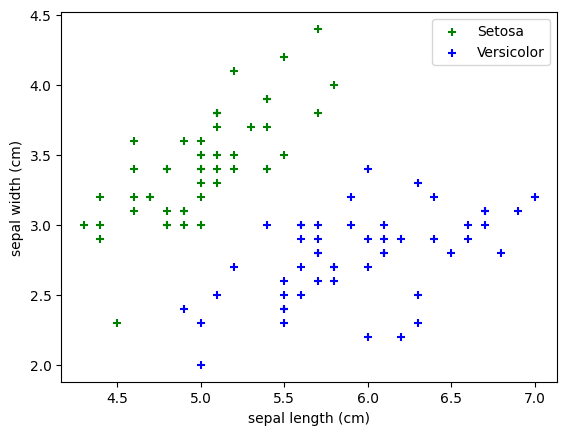

In [107]:
# 필요한 라이브러리 임포트
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터셋을 로드
iris = datasets.load_iris()

# iris 데이터를 이용해 데이터프레임 생성
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 'label' 열 추가
df['label'] = iris.target

# 'target_names'을 이용해 꽃 이름 추가
df['species'] = df['label'].apply(lambda x: iris.target_names[x])

# 각 종별로 데이터프레임 분리
df0 = df[df.label == 0]
df1 = df[df.label == 1]
df2 = df[df.label == 2]

# 산점도 그리기
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+', label='Versicolor')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()  # 범례 추가
plt.show()

Text(0, 0.5, 'petal width (cm)')

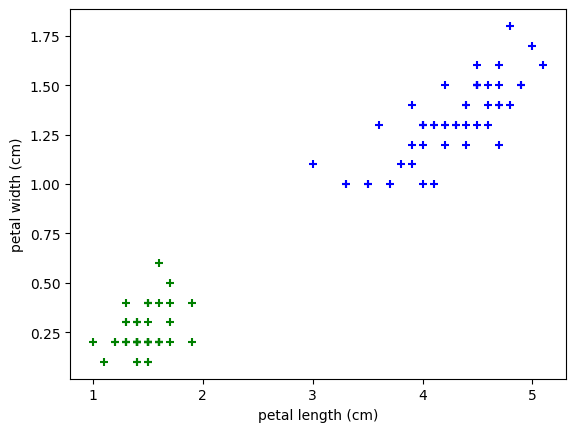

In [108]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [109]:
X = df.drop(['label', 'species'], axis = 'columns')
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC(C=10)
# C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.
# shift tab으로 SVC확인!(여러 파라미터들이 있다.)

model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

### SVM2

In [110]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### 데이터셋 생성, iris 데이터셋 사용

In [111]:
iris = datasets.load_iris()

X = iris.data[:, :2]   # 꽃잎 길이, 폭  만 사용
y = iris.target

 # sklearn에서 제공하는 model_selection  패키지에서 제공하는 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

#X_train.shape
#X_test.shape
#y_train.shape
y_test.shape

(45,)

#### SVM 모델 생성 및 학습 (RBF 커널 사용 - 다중)

In [112]:
model = svm.SVC(kernel='rbf', gamma='scale' )       # kernel = 'linear' : 선형 커널을 사용하여 데이터를 분류,  3D= 'RBF'

model.fit(X_train, y_train)                         # 훈련 데이터를 사용하여 svm 분류기를 훈련

SVC()

In [113]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

print(y_pred)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


In [114]:
print("Accuracy : ", accuracy_score(y_test, y_pred) )
print("classification_report : \n", classification_report(y_test, y_pred))

Accuracy :  0.8
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



### 학습 데이터와 Decision boundary Visualization(결정 경계 시각화 )

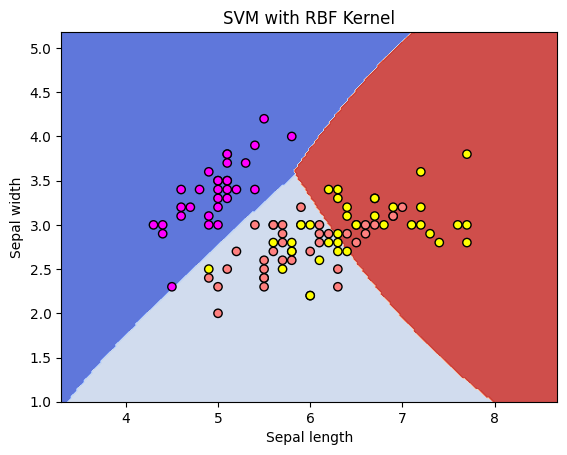

In [116]:
def plot_decision_boundary(X, y, model):
  h = 0.02              # 결정경계의 해상도
  x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
  y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z,  cmap='coolwarm', alpha=0.9) # 'coolwarm' 컬러맵 사용
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring', edgecolors='k', marker='o')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title('SVM with RBF Kernel')
  plt.show()

# 결정경계 시각화
plot_decision_boundary(X_train, y_train, model)